In [1]:
from matplotlib.pyplot import imshow
import skimage.color
import skimage.io as io
from pylab import *
import skimage
from skimage import data, filters, exposure, feature
from skimage.filters import rank
from skimage.util.dtype import convert
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt  
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from IPython.core.display import clear_output

import warnings
warnings.simplefilter("ignore")

In [2]:
def show_gray(img):
    imshow(img, cmap='gray')

# Reprezentacja obrazów

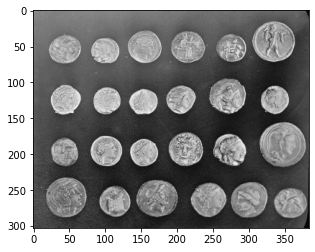

In [3]:
coins = data.coins()
show_gray(coins)

In [4]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [5]:
type(coins)

numpy.ndarray

In [6]:
coins.shape

(303, 384)

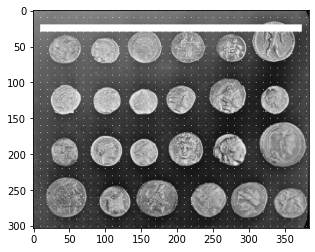

In [7]:
coins[20:30, 10:-10] = 255
coins[::10, ::10] = 255
show_gray(coins)

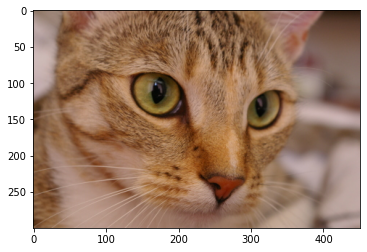

In [8]:
chelsa = data.chelsea()
imshow(chelsa)

In [9]:
chelsa.shape

(300, 451, 3)

In [10]:
chelsa[:4,:4,:]

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        [141, 118, 102]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        [142, 119, 103]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        [145, 121, 108]],

       [[151, 129, 116],
        [149, 127, 114],
        [147, 125, 112],
        [147, 125, 112]]], dtype=uint8)

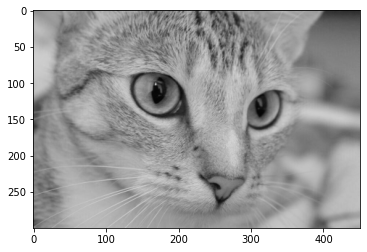

In [11]:
tmp = rgb2hsv(chelsa)
tmp[:,:,1] = 0
tmp = hsv2rgb(tmp)
imshow(tmp)

In [12]:
@interact(x=(0.0, 1.0, 0.01))
def on_change(x=0):
    tmp = rgb2hsv(chelsa)
    tmp[:,:,0] = x
    display(imshow(hsv2rgb(tmp)))

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

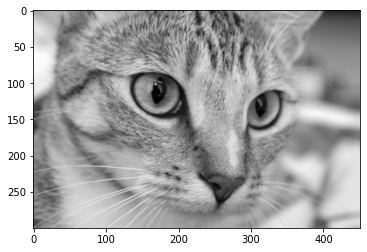

In [13]:
tmp = rgb2gray(chelsa)
display(imshow(tmp, cmap='gray'))

In [14]:
rgb2gray??

## Inne operacje macierzowe

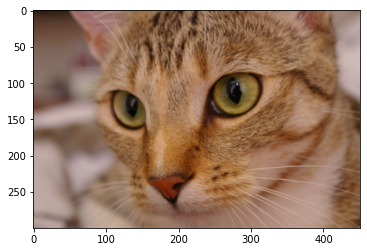

In [15]:
# Odbicie lustrzane
imshow(chelsa[:,::-1])

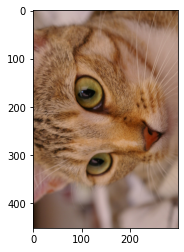

In [16]:
# Swap axes 0 and 1 (do not chagne 2)
imshow(chelsa.transpose(1, 0, 2))

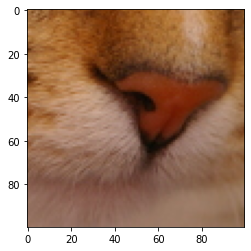

In [17]:
# Wycięcie
imshow(chelsa[200:300,200:300])

None

(96.85551602035204, 52.87981861986824)

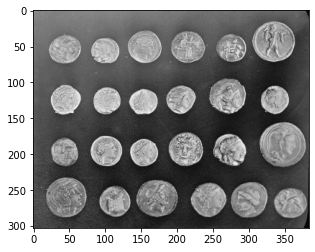

In [18]:
# Proste statystyki
coins = data.coins()
display(show_gray(coins))
np.mean(coins), np.std(coins)

# Proste przetwarzanie

### Histogram

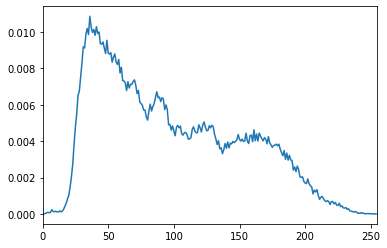

In [19]:
def plot_hist(img):
    img = img_as_ubyte(img)
    histo, x = np.histogram(img, range(0, 256), density=True)
    plot(histo)
    xlim(0, 255)
    
plot_hist(data.coins())

## Operacje punktowe

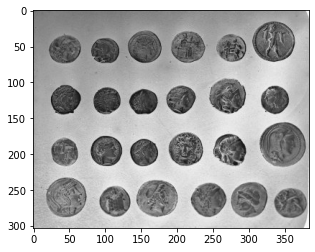

In [20]:
# B[i,j] = g(A[i,j]) dla każdego i,j
show_gray(255-coins)

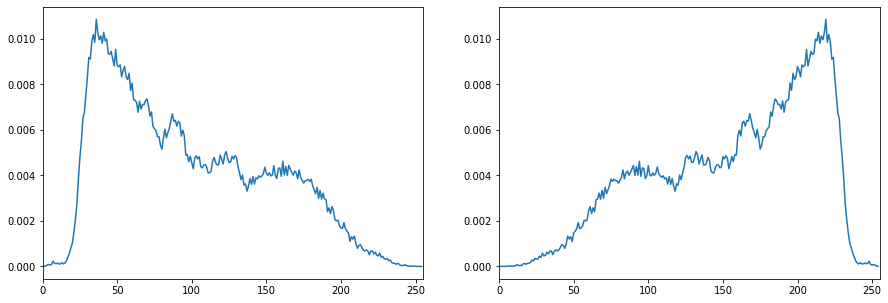

In [21]:
# Co się dzieje z histogramami?
figure(figsize=(15,5))
subplot(1,2,1); plot_hist(coins)
subplot(1,2,2); plot_hist(255-coins)

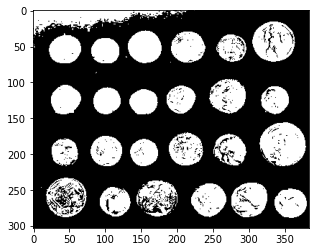

In [22]:
thresh = 120
binary = (coins > thresh) * 255
binary = np.uint8(binary) # unit64 => unit8
show_gray(binary)

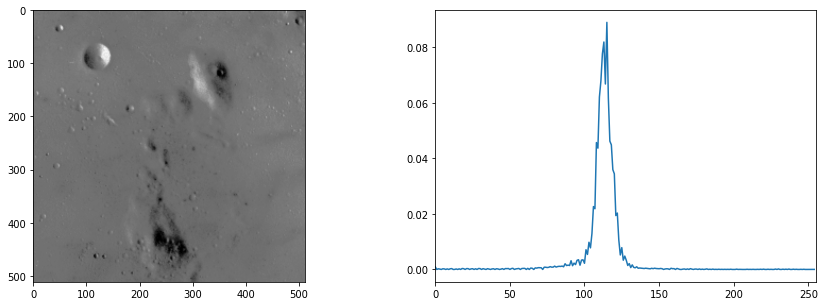

In [23]:
# Normalizacja
img = data.moon()
figure(figsize=(15,5))
subplot(1,2,1); show_gray(img)
subplot(1,2,2); plot_hist(img)

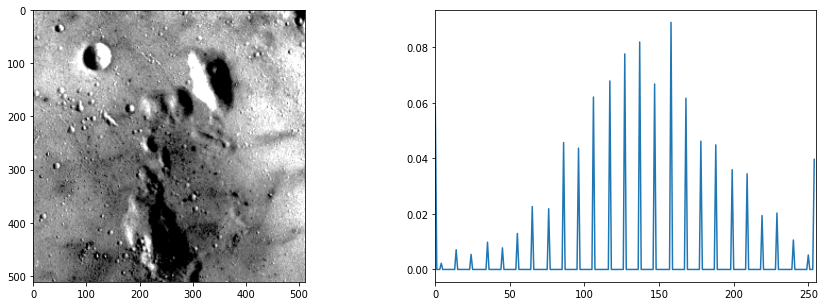

In [24]:
img = img_as_float(data.moon())
MIN = 100 / 256
MAX = 125 / 256

norm = (img - MIN) / (MAX - MIN)
norm[norm > 1] = 1
norm[norm < 0] = 0

figure(figsize=(15,5))
subplot(1,2,1); show_gray(norm)
subplot(1,2,2); plot_hist(norm)

In [25]:
img = img_as_float(data.moon())
@interact(perc=(0,10,0.1))
def on_change(perc=0.0):
    MIN = np.percentile(img, perc)
    MAX = np.percentile(img, 100-perc)

    norm = (img - MIN) / (MAX - MIN)
    norm[norm[:,:] > 1] = 1
    norm[norm[:,:] < 0] = 0
    
    fig = figure(figsize=(15,5))
    subplot(1,2,1); show_gray(norm)
    subplot(1,2,2); plot_hist(norm)

interactive(children=(FloatSlider(value=0.0, description='perc', max=10.0), Output()), _dom_classes=('widget-i…

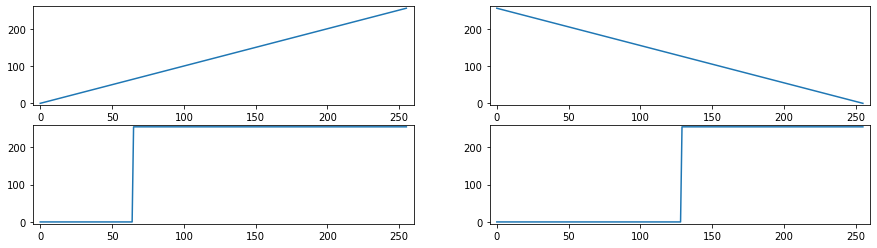

In [26]:
# Operacje punktowe można wygodnie wyświetlić
def identity(v):
    return v

def negate(v):
    return 255-v

def get_thresh(th):
    def thresh(v):
        return 255*(v>th)
    return thresh

def plot_point_op(fun):
    xlim(-5, 260)
    ylim(-5, 260)
    plot([fun(v) for v in np.arange(0,256)])
    
figure(figsize=(15,4))
subplot(2,2,1); plot_point_op(identity)
subplot(2,2,2); plot_point_op(negate)
subplot(2,2,3); plot_point_op(get_thresh(64))
subplot(2,2,4); plot_point_op(get_thresh(128))

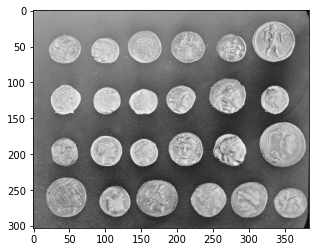

In [27]:
# Krzywa gamma
img = img_as_float(data.coins())

show_gray(img**0.7)

In [28]:
img = img_as_float(data.coins())

def get_gamma_fun(g):
    def gamma(v):
        return 255*((v/255)**g)
    return gamma

@interact(gamma=(0,10,0.1))
def on_change(gamma=1.0):
    tmp = img ** gamma
    
    figure(figsize=(15,5))
 
    subplot(1,3,1); show_gray(tmp)
    subplot(1,3,2); plot_hist(tmp)
    subplot(1,3,3); plot_point_op(get_gamma_fun(gamma))

interactive(children=(FloatSlider(value=1.0, description='gamma', max=10.0), Output()), _dom_classes=('widget-…

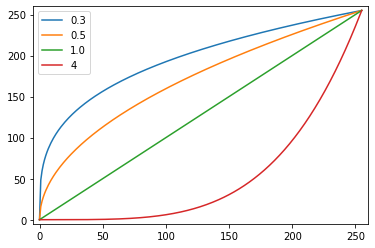

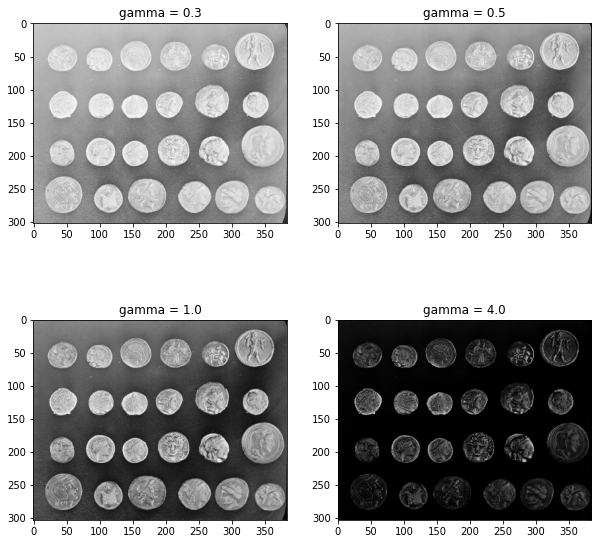

In [29]:
coins = img_as_float(data.coins())
figure()
plot_point_op(get_gamma_fun(0.3))
plot_point_op(get_gamma_fun(0.5))
plot_point_op(get_gamma_fun(1.0))
plot_point_op(get_gamma_fun(4))
legend((0.3, 0.5, 1.0, 4), loc='best')
figure(figsize=(10,10))
subplot(2,2,1); title('gamma = 0.3'); show_gray(coins**0.3)
subplot(2,2,2); title('gamma = 0.5'); show_gray(coins**0.5)
subplot(2,2,3); title('gamma = 1.0'); show_gray(coins**1.0)
subplot(2,2,4); title('gamma = 4.0'); show_gray(coins**4.0)

## Konwolucja (splot)

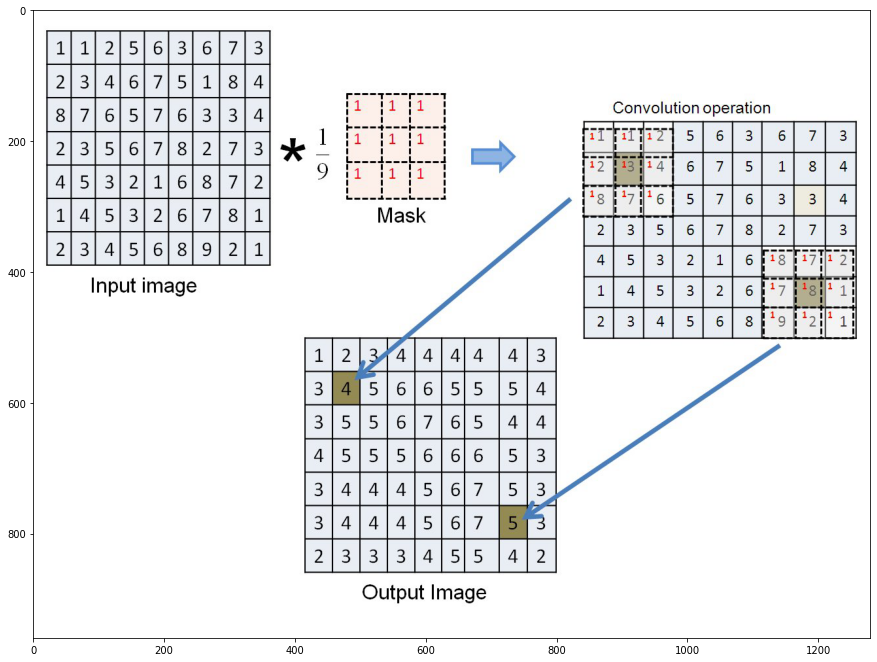

In [30]:
figure(figsize=(15,15))
imshow(io.imread('resources/images/convolution.png'))

## Filtry

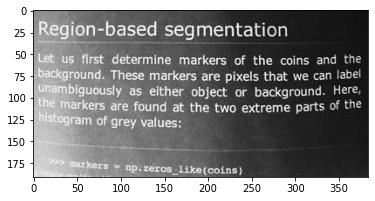

In [31]:
img = data.page()
imshow(img, cmap='Greys')

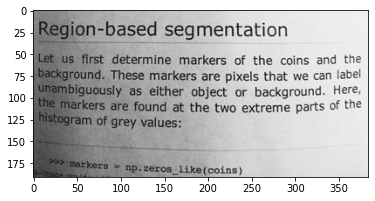

In [32]:
img = data.page()
img = img_as_float(img)
show_gray(img)

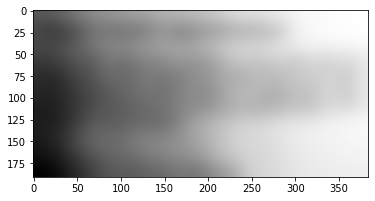

In [33]:
from skimage.filters.edges import convolve

K = ones([13,13])
K = K / sum(K)
res = img
for i in range(10):
    res = convolve(res, K)
show_gray(res)
# Co będzie jeśli zastosujemy wielokrotnie?

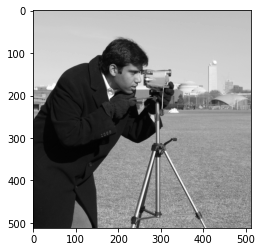

In [34]:
cam = img_as_float(data.camera())
show_gray(cam)

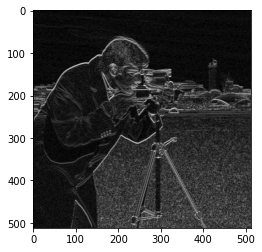

In [35]:
K = array([[ 1, 2, 1],
           [ 0, 0, 0],
           [-1,-2,-1]])
K = K / 4                       # Dlaczego przez 4?
res = abs(convolve(cam, K))  # Dlaczego abs?
show_gray(res**0.5)

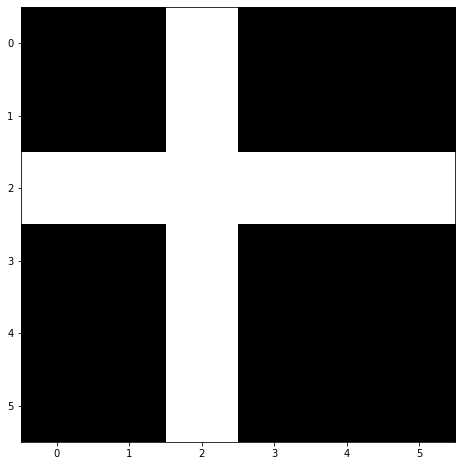

In [36]:
img = zeros([6,6])
img[2,:] = 1
img[:,2] = 1
figure(figsize=(8,8))
show_gray(img)

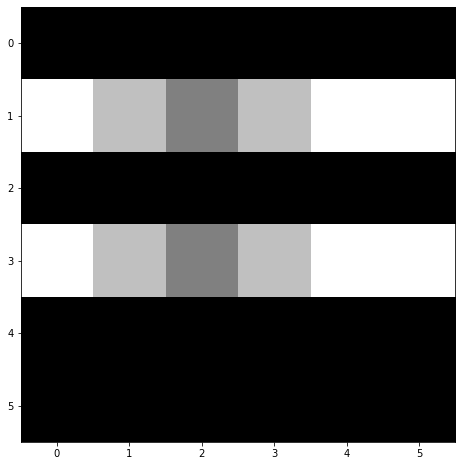

In [37]:
K = array([[ 1, 2, 1],
           [ 0, 0, 0],
           [ -1,-2,-1]])
K = K / 4
res = abs(convolve(img, K))
figure(figsize=(8,8))
show_gray(res)

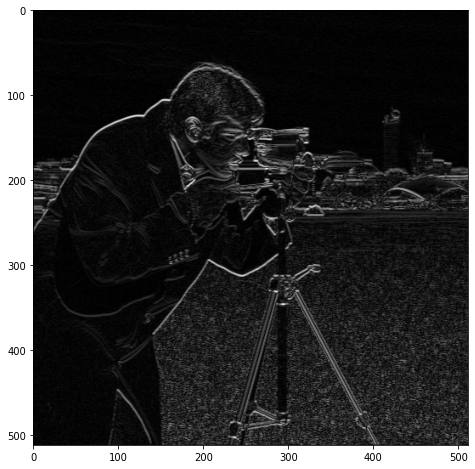

In [38]:
K = array([[ 1, 2, 1],
           [ 0, 0, 0],
           [-1,-2,-1]])
K = K / 8
res = abs(convolve(cam, K))
figure(figsize=(8,8))
show_gray(res**0.7)

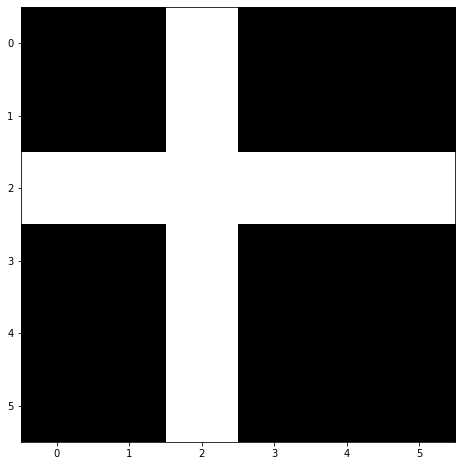

In [39]:
img = zeros([6,6])
img[2,:] = 1
img[:,2] = 1
figure(figsize=(8,8))
show_gray(img)

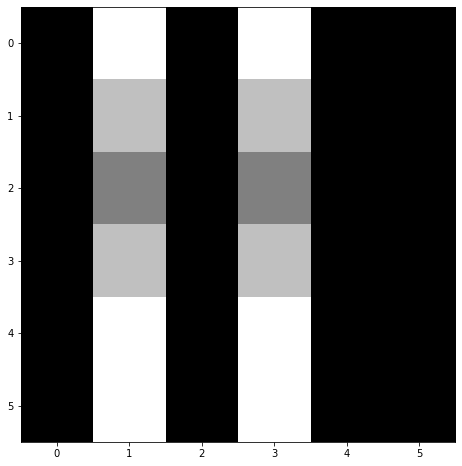

In [40]:
K = array([[ 1, 0,-1],
           [ 2, 0,-2],
           [ 1, 0,-1]])

K = K / 4
res = abs(convolve(img, K))
figure(figsize=(8,8))
show_gray(res)

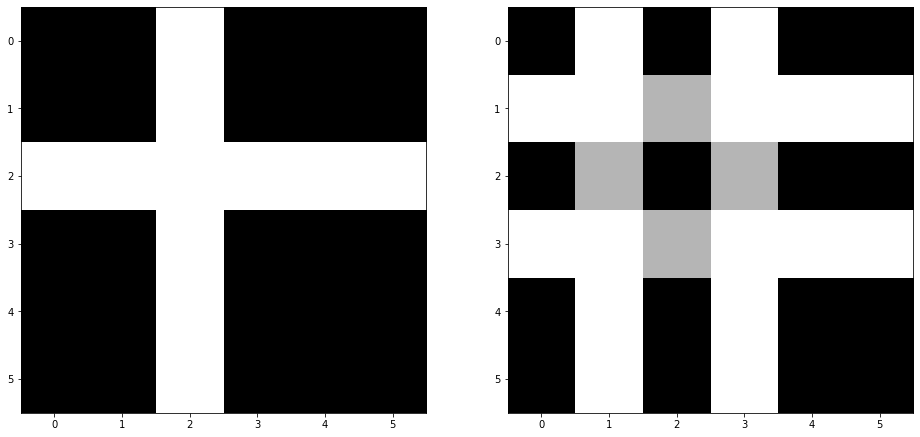

In [41]:
figure(figsize=(16,8))
subplot(1,2,1); imshow(img, cmap='gray')

Kh = array([[ 1, 2, 1],
            [ 0, 0, 0],
            [-1,-2,-1]]) / 4
Kv = array([[ 1, 0,-1],
            [ 2, 0,-2],
            [ 1, 0,-1]]) / 4

hor = abs(convolve(img, Kh))
ver = abs(convolve(img, Kv))

res = np.sqrt(hor + ver)

res = np.clip(res, a_min=0.0, a_max=1.0)

subplot(1,2,2); show_gray(res)

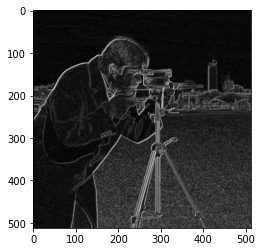

In [42]:
# Inne filtry wykrywające krawędzie: Roberts, Previtt
K = array([[ 1,  0],
           [ 0, -1]])

K = array([[ 1,  1,  0],
           [ 1,  0, -1],
           [ 0, -1, -1]])
K = K / 2                       
res = abs(convolve(cam, K))
show_gray(res**0.5)

## Używając skimage

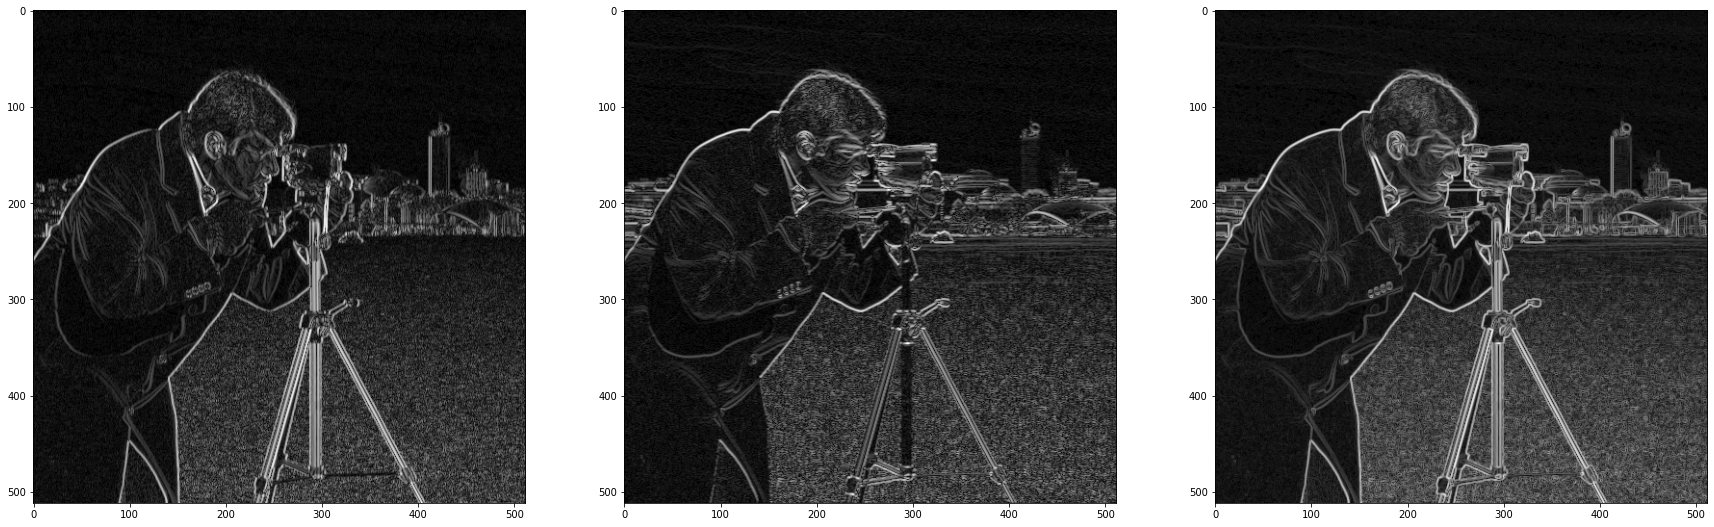

In [43]:
figure(figsize=(30,30))
subplot(1,3,1); show_gray(abs(filters.sobel_v(cam))**0.5)
subplot(1,3,2); show_gray(abs(filters.sobel_h(cam))**0.5)
subplot(1,3,3); show_gray(filters.sobel(cam)**0.5)

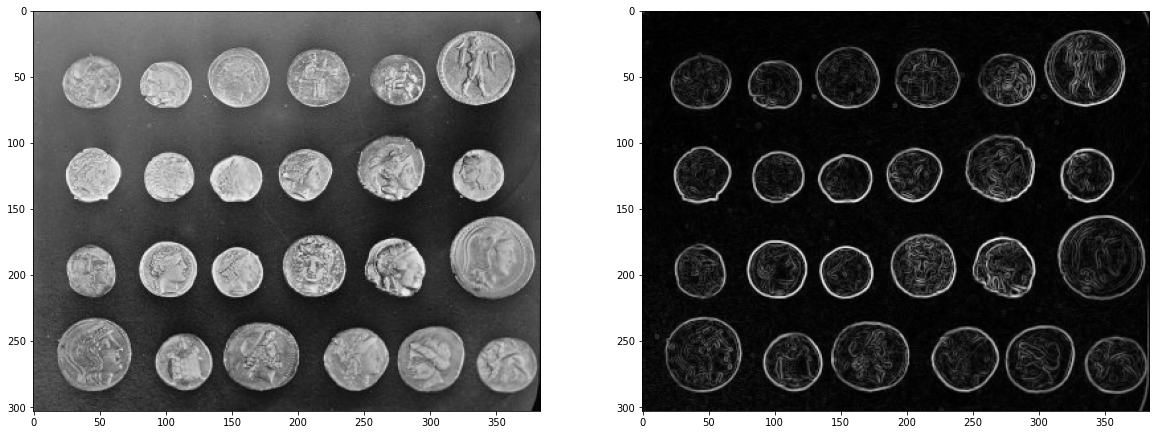

In [44]:
figure(figsize=(20,20))
subplot(1,2,1); show_gray(data.coins())
subplot(1,2,2); show_gray(filters.sobel(data.coins()))

## Odszumianie

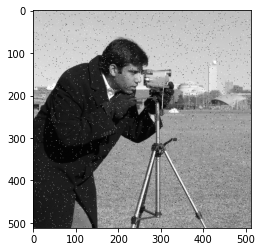

In [45]:
img = data.camera()
noise = np.random.random(img.shape)
img = img_as_ubyte(data.camera())
img[noise > 0.99] = 255
img[noise < 0.01] = 0
show_gray(img)

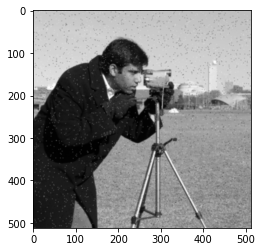

In [46]:
show_gray(filters.rank.mean(img, ones([3,3], dtype=uint8)))

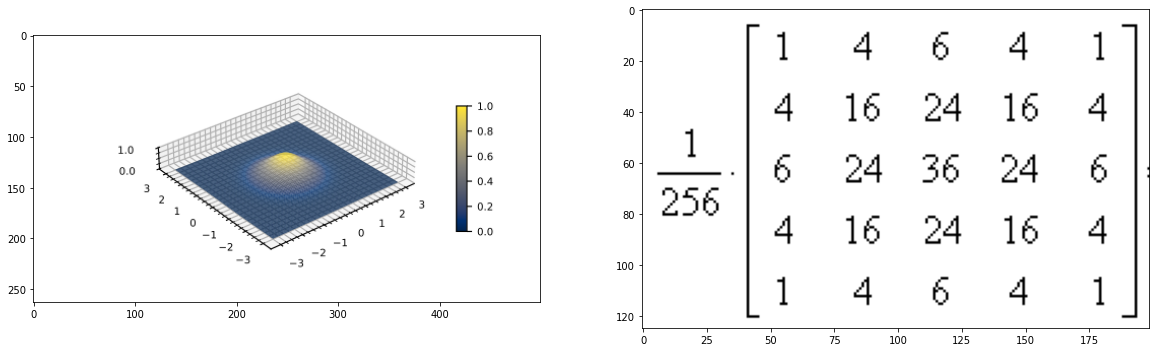

In [47]:
figure(figsize=(20,20))
subplot(1,2,1)
imshow(io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Gaussian_2d.svg/500px-Gaussian_2d.svg.png'))
subplot(1,2,2)
imshow(io.imread('http://4.bp.blogspot.com/_qEs9r36R5kw/S63QM-0V6kI/AAAAAAAAArY/9AQI1izF9Wk/s320/Picture+2.png'))

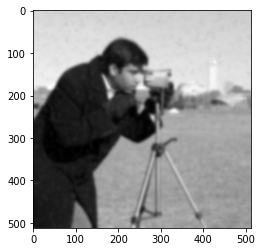

In [48]:
import scipy
show_gray(scipy.ndimage.gaussian_filter(img, sigma=3))

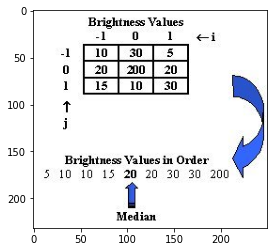

In [49]:
imshow(io.imread('http://tracer.lcc.uma.es/problems/mfp/MedianFilter.jpg'))

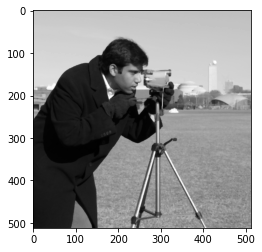

In [50]:
show_gray(filters.rank.median(img, ones([3,3],dtype=uint8)))

## Filtr Canny

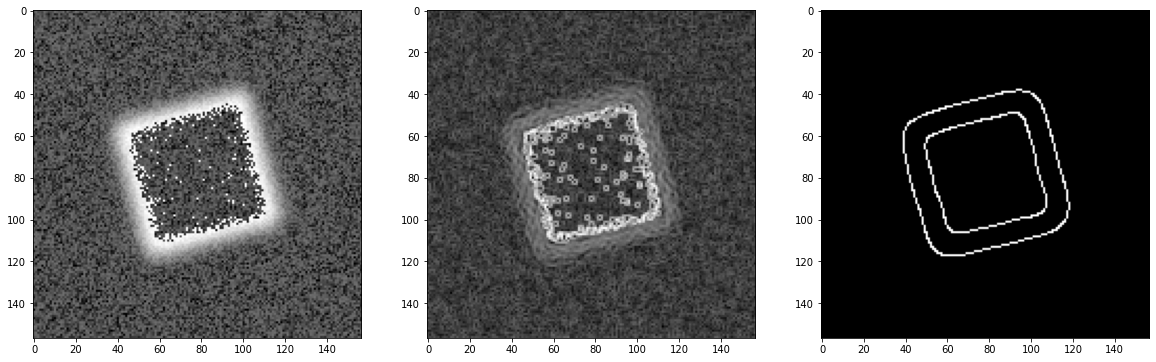

In [59]:
img = img_as_float(io.imread('resources/images/noisy.png'))
figure(figsize=(20,20))
subplot(1,3,1)
show_gray(img**0.5)
subplot(1,3,2)
show_gray(filters.sobel(img)**0.5)
subplot(1,3,3)
show_gray(skimage.feature.canny(img, sigma=4))